<h1> Integração Numérica - Método de Simpson </h1>

<h2> Análise Numérica </h2>

In [1]:
# Importando bibliotecas

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# funcoes 

def f(x):
    return np.exp(x)

def g(x):
    return np.exp(-x**2)

def trapezio(f, a, b):
    
    h = b - a
    
    T = (h/2) * (f(a) + f(b))
    
    return T

def reta(f, x, a, b):
    
    part1 = (x - b)/(a - b)
    part2 = (x - a)/(b - a)
    
    return part1 * f(a) + part2 * f(b)
    
def simpson(f, a, b, c):
    
    h = b - a
    
    S = (h/3) * (f(a) + 4*f(b) + f(c))
    
    return S

def parabola(f, x, a, b, c):
    
    part1 = ((x-b)*(x-c))/((a-b)*(a-c)) 
    part2 = ((x-a)*(x-c))/((b-a)*(b-c))
    part3 = ((x-a)*(x-b))/((c-a)*(c-b))
    
    return part1*f(a) + part2*f(b) + part3*f(c)

<h3> Área da Função $f(x) = e^{x}$ </h3>

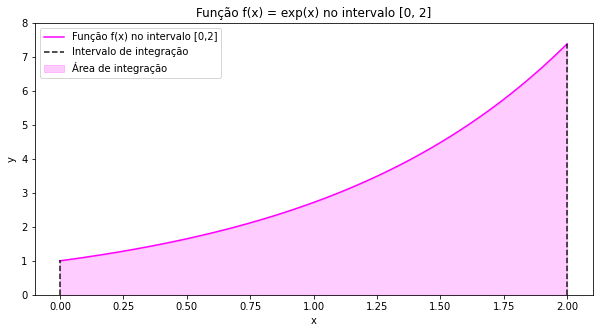

O valor da área dado pela integral da função é 6.38905609893065


In [3]:
# CALCULANDO A INTEGRAL DA FUNÇÃO
X = sp.Symbol("x")
exp = sp.exp(X)
area_funcao = sp.integrate(exp, (X, 0, 2)).evalf()

# Delimitações da figura
fig = plt.figure(figsize=(10,5)) 

plt.ylim(0, 8) # delimitando os pontos do eixo y 
x = np.linspace(0, 2, 200) # determinando os pontos do eixo x
funcao_x = f(x) 

# Visualizaçãço do problema
plt.plot(x, funcao_x, linestyle='-', label="Função f(x) no intervalo [0,2]", color = 'fuchsia', alpha=1) # plot da funcao
#plt.plot(x, funcao_x, linestyle='--', label="Área de integração", color = 'black', alpha=0.9) # delimitação da área 
plt.plot([0, 0], [0, funcao_x[1]], '--', label="Intervalo de integração", color = "black", alpha=0.9) # delimitação da área 
plt.plot([2, 2], [0, funcao_x[-1]], '--', color = "black", alpha=0.9) # delimitação da área 
plt.fill_between(x, funcao_x, label="Área de integração", color = "fuchsia", alpha=0.2) # área sob curva 

# Criar título central, título dos eixos e legendas
plt.title("Função f(x) = exp(x) no intervalo [0, 2]")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Plotar todo o gráfico com os comandos determinados anteriormente
plt.show()

print(f"O valor da área dado pela integral da função é {area_funcao}")

<h3> Área da Função $f(x) = e^{x}$ pelo método do Trápezio</h3>

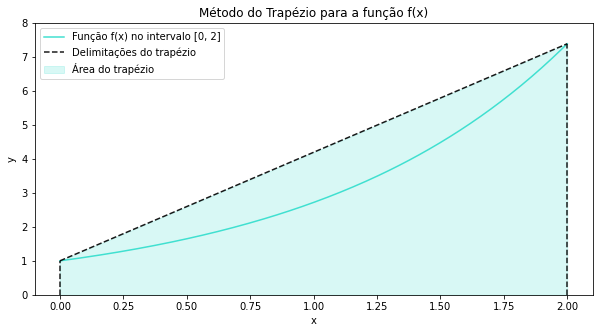

O valor da área dado pelo método do trapezio é 8.38905609893065


In [4]:
# Definindo a área do trapézio
a = 0 
b = 1
c = 2
polinomio_trapezio = reta(f, x, a, c) # solução gráfica
metodo_trapezio_f = trapezio(f, a, c) # solução numérica

# Plot da Figura 
fig = plt.figure(figsize=(10,5)) # tamanho da fugura
plt.ylim(0, 8) # delimitancao do eixo y 

# Visualização do problema 
plt.plot(x, funcao_x, linestyle='solid', label="Função f(x) no intervalo [0, 2]", color = 'turquoise', alpha=1) # plot da funcao 
plt.plot(x, polinomio_trapezio, linestyle='--', label='Delimitações do trapézio', color="black", alpha=0.9) # linhas do trapézio
plt.plot([a, a], [0, funcao_x[a]], '--', color = "black", alpha=0.9)  # linhas do trapézio
plt.plot([c, c], [0, funcao_x[-1]], '--', color = "black", alpha=0.9)  # linhas do trapézio
plt.fill_between([a, c], [funcao_x[a], funcao_x[-1]], label="Área do trapézio", color = "turquoise", alpha=0.2) # área do trapézio

# Criar título central, título dos eixos e legenda
plt.title("Método do Trapézio para a função f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Plotar todo o gráfico com os comandos determinados anteriormente
plt.show()   

print(f"O valor da área dado pelo método do trapezio é {metodo_trapezio_f}")

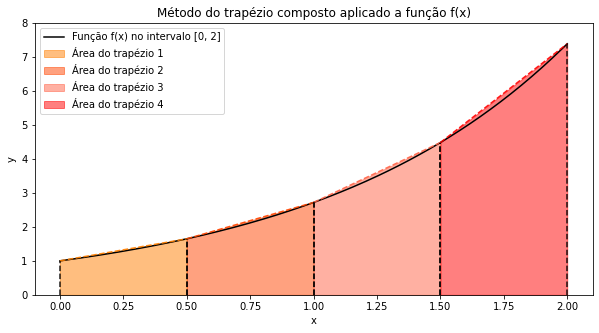

O valor da área dado pelo método do trapézio composto é 6.521610109481282


In [5]:
# CALCULANDO MÉTODO DO TRAPÉZIO
intervalos = [(0, 0.5), (0.5, 1), (1, 1.5), (1.5, 2)]

area_trapezio = []

# Delimitações da figura
fig = plt.figure(figsize=(10,5))
plt.ylim(0, 8) # delimitancao do eixo y 


# Visualizaçãço do problema
plt.plot(x, funcao_x, linestyle='solid', label="Função f(x) no intervalo [0, 2]", color = 'black', alpha=1) # plot da funcao

cores = ["#FF7F00","#FF4500", "#FF6347", "#FF0000"]

cor = 0
contador = 1

for a, b in intervalos:
    
    x_t = np.linspace(a, b, 200)
    area = trapezio(f, a, b)
    area_trapezio.append(area)
    
    reta_trapezio = reta(f, x_t, a, b)
    
    plt.plot(x_t, reta_trapezio, linestyle='--', color = cores[cor], alpha=0.9) # delimitação da área 
    plt.plot([a, a], [0, reta_trapezio[0]], '--', color = "black", alpha=0.9) # delimitação da área 
    plt.plot([b, b], [0, reta_trapezio[-1]], '--', color = "black", alpha=0.9) # delimitação da área 
    plt.fill_between(x_t, reta_trapezio, label=f"Área do trapézio {contador}", color = cores[cor], alpha=0.5) # área sob curva 
    
    cor += 1
    contador += 1

# Criar título central, título dos eixos e legendas
plt.title("Método do trapézio composto aplicado a função f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Plotar todo o gráfico com os comandos determinados anteriormente
plt.show()

print(f"O valor da área dado pelo método do trapézio composto é {sum(area_trapezio)}")

<h3> Área da Função $f(x) = e^{x}$ pelo método de Simpson</h3>

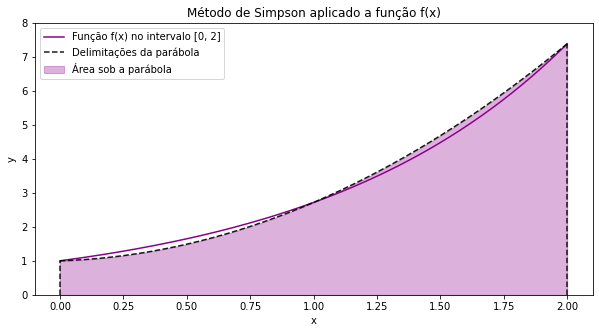

O valor da área dado pelo método de Simpson é 6.42072780425561


In [6]:
# Definição da área da parabola
a = 0 
b = 1
c = 2
polinomio_simpson = parabola(f, x, a, b, c) # solução gráfica
metodo_simpson_f = simpson(f, a, b, c) # solução numérica

# Plot da Figura 
fig = plt.figure(figsize=(10,5))
plt.ylim(0, 8) # delimitando o eixo y

# Visualização do problema
plt.plot(x, funcao_x, linestyle='solid', label="Função f(x) no intervalo [0, 2]", color = '#8B008B', alpha=1) # plot da funcao
plt.plot(x, polinomio_simpson, linestyle='--', label='Delimitações da parábola', color = 'black', alpha=0.9) # Polinomio de grau 2
plt.plot([a, a], [0, funcao_x[a]], '--', color = "black", alpha=0.9) # delimitaçao da área
plt.plot([c, c], [0, funcao_x[-1]], '--', color = "black", alpha=0.9) # delimitaçao da área
plt.fill_between(x, polinomio_simpson, label="Área sob a parábola", color = "#8B008B", alpha=0.3) # área da parabola

# Criar título central, título dos eixos e legenda
plt.title("Método de Simpson aplicado a função f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Plotar todo o gráfico com os comandos determinados anteriormente
plt.show()

print(f"O valor da área dado pelo método de Simpson é {metodo_simpson_f}")

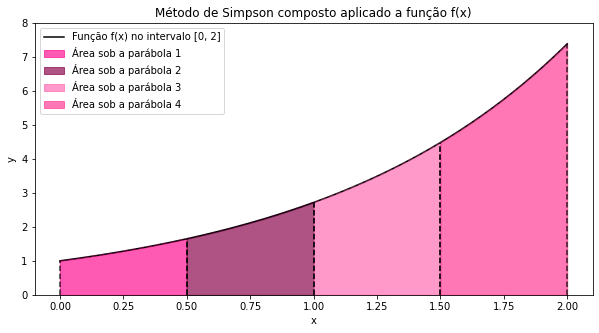

O valor da área dado pelo método do trapézio composto é 6.389193725416423


In [7]:
# Delimitações da figura
fig = plt.figure(figsize=(10,5)) 
plt.ylim(0, 8) # delimitando os pontos do eixo y 

plt.plot(x, funcao_x, linestyle='solid', label="Função f(x) no intervalo [0, 2]", color = 'black', alpha=1) # plot da funcao

area_intervalos = []
pontos = list(np.linspace(0, 2, 9))

cores = ["#FF1493", "#8D0A50", "#FF6EB4", "#FF3E96"]
intervalo = 0
contador = 1
cor = 0
    
for i in range(4):

    a = pontos[intervalo]
    b = pontos[intervalo + 1]
    c = pontos[intervalo + 2]

    x3 = np.linspace(a, c, 200)

    simpson_composto = parabola(f, x3, a, b, c)

    simpson_simples_area = simpson(f, a, b, c)
        
    area_intervalos.append(simpson_simples_area)


    plt.plot(x3, simpson_composto, color=cores[cor], linestyle='--', alpha=0.3) # polinomio de grau 2
    plt.plot([a, a], [0, simpson_composto[0]], '--', color="black", alpha=0.8) # delimitação da área
    plt.plot([c, c], [0, simpson_composto[-1]], '--', color = "black", alpha=0.8) # delimitação da área
    plt.fill_between(x3, simpson_composto, label=f"Área sob a parábola {contador}",color =cores[cor], alpha=0.7) # área da parabola

    cor += 1
    intervalo += 2
    contador += 1

    
# Criar título central, título dos eixos e legendas
plt.title("Método de Simpson composto aplicado a função f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Plotar todo o gráfico com os comandos determinados anteriormente
plt.show()    
print(f"O valor da área dado pelo método do trapézio composto é {sum(area_intervalos)}")

<h3> Área da função $g(x) = e^{-x^{2}}$  </h3>

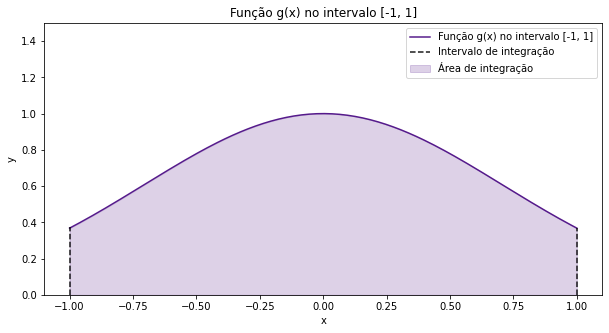

O valor da área dado pela integral da função é 2.35040238728760


In [8]:
# CALCULANDO A INTEGRAL DA FUNÇÃO
X = sp.Symbol("x")
exp2 = sp.exp(-X**2)
area_funcao = sp.integrate(exp, (X, -1, 1)).evalf()

# Delimitações da figura 
fig = plt.figure(figsize=(10,5))

plt.ylim(0, 1.5) # intervalo do eixo y
x_g = np.linspace(-1, 1, 200) # determinando os pontos do eixo x
funcao_g = g(x_g) # determinando os pontos do eixo y

# Visualização gráfica do problema
plt.plot(x_g, funcao_g, linestyle='-', label="Função g(x) no intervalo [-1, 1]", color = '#551A8B', alpha=1) # funcao g(x)
#plt.plot(x_g, funcao_g, linestyle='--', label="Delimitações do intervalo", color = 'black', alpha=0.9) # delimitação da área 
plt.plot([-1, -1], [0, funcao_g[1]], '--',label="Intervalo de integração", color = "black", alpha=0.9) # delimitação da área 
plt.plot([1, 1], [0, funcao_g[-1]], '--', color = "black", alpha=0.9) # delimitação da área 
plt.fill_between(x_g, funcao_g,  label="Área de integração", color = "#551A8B", alpha=0.2) # área sob curva 

# Criar título central, título dos eixos e legenda
plt.title("Função g(x) no intervalo [-1, 1]")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Plotar todo o gráfico com os comandos determinados anteriormente
plt.show()

print(f"O valor da área dado pela integral da função é {area_funcao}")

<h3> Área da função $g(x) = e^{-x^{2}}$ pelo método de Simpson </h3>

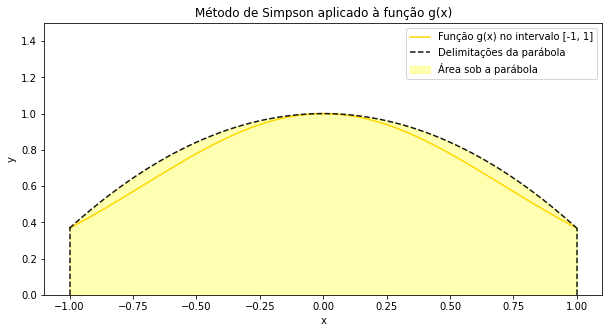

O valor da área dado pelo método do trapézio simples é 1.5785862941142952


In [9]:
# CALCULANDO MÉTODO DE SIMPSON

a = -1
b = 0
c = 1

simpson_simples = parabola(g, x_g, a, b, c)
simpson_simples_area = simpson(g, a, b, c)

# Delimitações da figura 
fig = plt.figure(figsize=(10,5))

plt.ylim(0, 1.5) # intervalo do eixo y
x_g = np.linspace(-1, 1, 200) # determinando os pontos do eixo x
funcao_g = g(x_g) # determinando os pontos do eixo y

# Visualização gráfica do problema
plt.plot(x_g, funcao_g, linestyle='-', label="Função g(x) no intervalo [-1, 1]", color = 'gold', alpha=1) # funcao g(x)
plt.plot(x_g, simpson_simples, linestyle='--', label="Delimitações da parábola", color = 'black', alpha=0.9) # delimitação da área 
plt.plot([-1, -1], [0, funcao_g[1]], '--', color = "black", alpha=0.9) # delimitação da área 
plt.plot([1, 1], [0, funcao_g[-1]], '--', color = "black", alpha=0.9) # delimitação da área 
plt.fill_between(x_g, simpson_simples, label="Área sob a parábola", color = "yellow", alpha=0.3) # área sob curva 

# Criar título central, título dos eixos e legenda
plt.title("Método de Simpson aplicado à função g(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Plotar todo o gráfico com os comandos determinados anteriormente
plt.show()

print(f"O valor da área dado pelo método do trapézio simples é {simpson_simples_area}")

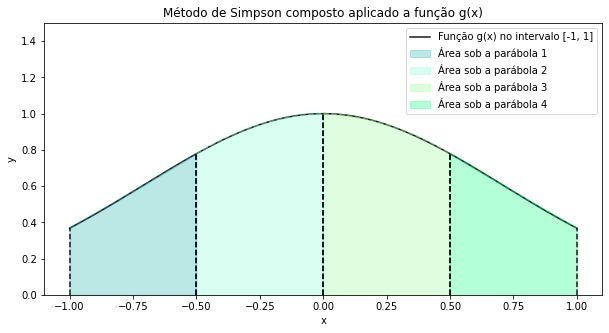

O valor da área dado pelo método do trapézio composto é 1.4937107595819747


In [10]:
# Delimitações da figura
fig = plt.figure(figsize=(10,5)) 
plt.ylim(0, 1.5) # delimitando os pontos do eixo y 

area_intervalos = []
pontos = list(np.linspace(-1, 1, 9))

plt.plot(x_g, funcao_g, linestyle='-', label="Função g(x) no intervalo [-1, 1]", color = 'black', alpha=0.9) # funcao g(x)

cores = ["lightseagreen","aquamarine", "palegreen", "springgreen"]
intervalo = 0
contador = 1
cor = 0
    
for i in range(4):

    a = pontos[intervalo]
    b = pontos[intervalo + 1]
    c = pontos[intervalo + 2]

    x3 = np.linspace(a, c, 200)

    simpson_composto = parabola(g, x3, a, b, c)

    simpson_simples_area = simpson(g, a, b, c)
        
    area_intervalos.append(simpson_simples_area)


    plt.plot(x3, simpson_composto, color=cores[cor], linestyle='--', alpha=0.5) # polinomio de grau 2
    plt.plot([a, a], [0, simpson_composto[0]], '--', color="black", alpha=0.9) # delimitação da área
    plt.plot([c, c], [0, simpson_composto[-1]], '--', color = "black", alpha=0.9) # delimitação da área
    plt.fill_between(x3, simpson_composto, label=f"Área sob a parábola {contador}",color =cores[cor], alpha=0.3) # área da parabola

    cor += 1
    intervalo += 2
    contador += 1

    
# Criar título central, título dos eixos e legendas
plt.title("Método de Simpson composto aplicado a função g(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Plotar todo o gráfico com os comandos determinados anteriormente
plt.show()    
print(f"O valor da área dado pelo método do trapézio composto é {sum(area_intervalos)}")

<h3> Área da função $g(x) = e^{-x^{2}}$ pelo método do trapézio </h3>

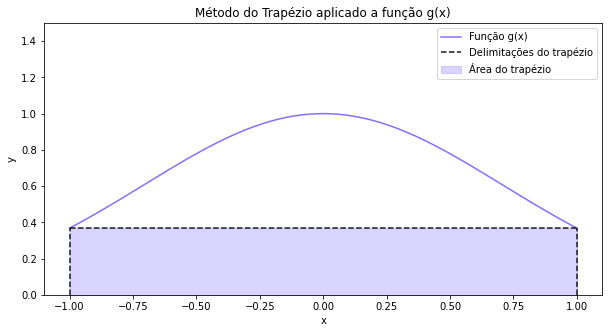

O valor da área dado pelo método do trapézio simples é 0.7357588823428847


In [11]:
# CALCULANDO MÉTODO DO TRAPÉZIO
a = -1
b = 1

trapezio_simples = reta(g, x_g, a, b)
trapezio_simples_area = trapezio(g, a, b)

# Delimitações da figura 
fig = plt.figure(figsize=(10,5))

plt.ylim(0, 1.5) # intervalo do eixo y
x_g = np.linspace(-1, 1, 200) # determinando os pontos do eixo x
funcao_g = g(x_g) # determinando os pontos do eixo y

# Visualização gráfica do problema
plt.plot(x_g, funcao_g, linestyle='-', label="Função g(x)", color = '#836FFF', alpha=1) # funcao g(x)
plt.plot(x_g, trapezio_simples, linestyle='--', label="Delimitações do trapézio", color = 'black', alpha=0.9) # delimitação da área 
plt.plot([-1, -1], [0, funcao_g[0]], '--', color = "black", alpha=0.9) # delimitação da área 
plt.plot([1, 1], [0, funcao_g[-1]], '--', color = "black", alpha=0.9) # delimitação da área 
plt.fill_between(x_g, trapezio_simples, label="Área do trapézio", color = "#836FFF", alpha=0.3) # área sob curva 

# Criar título central, título dos eixos e legenda
plt.title("Método do Trapézio aplicado a função g(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Plotar todo o gráfico com os comandos determinados anteriormente
plt.show()

print(f"O valor da área dado pelo método do trapézio simples é {trapezio_simples_area}")

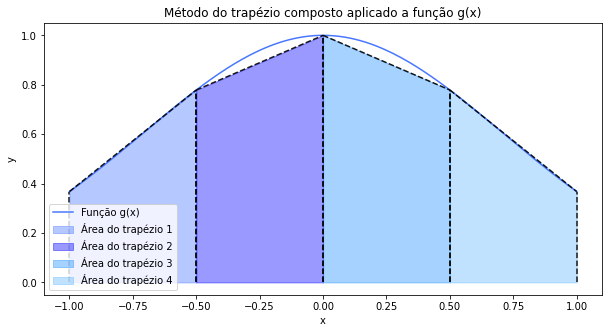

O valor da área dado pelo método do trapézio composto é 1.4627405036571262


In [12]:
# CALCULANDO MÉTODO DO TRAPÉZIO
intervalos = [(-1, -0.5), (-0.5, 0), (0, 0.5), (0.5, 1)]

area_trapezio = []

# Delimitações da figura
fig = plt.figure(figsize=(10,5)) 


# Visualizaçãço do problema
plt.plot(x_g, funcao_g, linestyle='-', label="Função g(x)", color = '#4876FF', alpha=1) # plot da funcao

cores = ["#4876FF","#0000FF", "#1E90FF", "#63B8FF"]

cor = 0
contador = 1

for a, b in intervalos:
    
    x_g = np.linspace(a, b, 200)
    area = trapezio(g, a, b)
    area_trapezio.append(area)
    
    reta_trapezio = reta(g, x_g, a, b)
    
    plt.plot(x_g, reta_trapezio, linestyle='--', color = 'black', alpha=0.9) # delimitação da área 
    plt.plot([a, a], [0, reta_trapezio[0]], '--', color = "black", alpha=0.9) # delimitação da área 
    plt.plot([b, b], [0, reta_trapezio[-1]], '--', color = "black", alpha=0.9) # delimitação da área 
    plt.fill_between(x_g, reta_trapezio, label=f"Área do trapézio {contador}", color = cores[cor], alpha=0.4) # área sob curva 
    
    cor += 1
    contador += 1

# Criar título central, título dos eixos e legendas
plt.title("Método do trapézio composto aplicado a função g(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Plotar todo o gráfico com os comandos determinados anteriormente
plt.show()

print(f"O valor da área dado pelo método do trapézio composto é {sum(area_trapezio)}")